In [1]:
"Calculate metrics to effectively report characteristics of data and relationships between features"

'Calculate metrics to effectively report characteristics of data and relationships between features'

In [2]:
# load data for study
from sklearn.datasets import  load_iris
import pandas as pd

data = load_iris(as_frame=True)
iris = pd.concat([data.data, data.target], axis=1)

map_names = {
    0 : data.target_names[0],
    1 : data.target_names[1],
    2 : data.target_names[2]
}

iris['target'] = iris['target'].replace(map_names)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.1 Calculate metrics to effectively report characteristics of data and relationships between features

In [3]:
# 1.1 * Calculate measures of center (e.g. mean, median, mode) for variables using R or Python.

import numpy as np
mean = np.mean(iris[['sepal length (cm)'	,'sepal width (cm)'	,'petal length (cm)'	,'petal width (cm)']], axis=0)
print(f'mean : \n{mean}\n', end='\n')

median = np.median(iris[['sepal length (cm)'	,'sepal width (cm)'	,'petal length (cm)'	,'petal width (cm)']], axis=0)
print(f'median : \n{median}\n', end='\n')

# mode
columns = ['sepal length (cm)'	,'sepal width (cm)'	,'petal length (cm)'	,'petal width (cm)']

# using scipy
from scipy import stats
mode, count = stats.mode(iris[columns], keepdims=True)
for item in range(len(columns)):
    print(f"The mode for col: '{columns[item]}' is {mode[0][item]}")

mean : 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

median : 
[5.8  3.   4.35 1.3 ]

The mode for col: 'sepal length (cm)' is 5.0
The mode for col: 'sepal width (cm)' is 3.0
The mode for col: 'petal length (cm)' is 1.4
The mode for col: 'petal width (cm)' is 0.2


In [4]:
# sanity check for mode on the sepal length (cm) column
list(iris['sepal length (cm)'].value_counts().sort_values(ascending = False).index)[0]

5.0

In [5]:
# 1.1 * Calculate measures of spread (e.g. range, standard deviation, variance) for variables using R or Python.

for r in range(len(columns)):
    quant = np.quantile(iris[columns[r]],[0,1])
    print(f'range for column "{columns[r]}" is : {quant}\n')

std = np.std(iris[columns])
print(f'standard deviation: \n{std}\n')

variance = np.var(iris[columns])
print(f'variance: \n{variance}\n')

range for column "sepal length (cm)" is : [4.3 7.9]

range for column "sepal width (cm)" is : [2.  4.4]

range for column "petal length (cm)" is : [1.  6.9]

range for column "petal width (cm)" is : [0.1 2.5]

standard deviation: 
sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
dtype: float64

variance: 
sepal length (cm)    0.681122
sepal width (cm)     0.188713
petal length (cm)    3.095503
petal width (cm)     0.577133
dtype: float64



In [6]:
# 1.1 * Calculate skewness for variables using R or Python.

"""
The skewness of a variable is a measure of its asymmetry. A positive skew indicates that the distribution of the variable is skewed to the right, while a negative skew indicates that the distribution is skewed to the left. A skewness of 0 indicates that the distribution is symmetric.
"""

skewness = iris[columns].skew()
skewness

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [7]:
# 1.1 * Calculate missingness for variables and explain its influence on reporting characteristics of data and relationships in R or Python.

"""
Missingness can affect the reporting characteristics of data and relationships in a number of ways. For example, if a variable has a high percentage of missing values, then the mean and standard deviation of the variable may not be accurate representations of the data. This is because the mean and standard deviation are calculated using all of the observations in the variable, including the missing observations. However, if a large percentage of the observations are missing, then the mean and standard deviation may be biased by the missing observations.
"""

missingness = iris.isnull().mean() * 100
missingness

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

In [8]:
# 1.1 * Calculate the correlation between variables using R or Python.

iris[columns].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## 1.2 Create data visualizations in coding language to demonstrate the characteristics of data

In [9]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


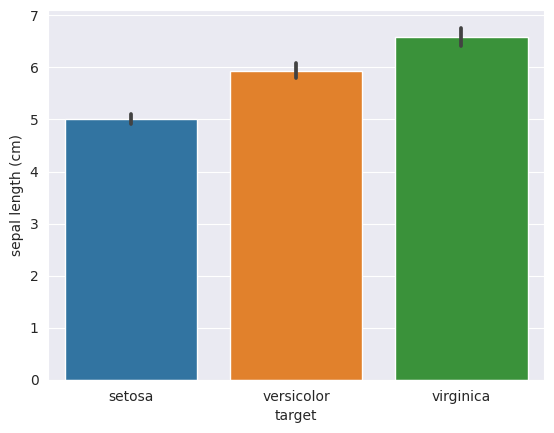

<Axes: xlabel='sepal length (cm)', ylabel='target'>

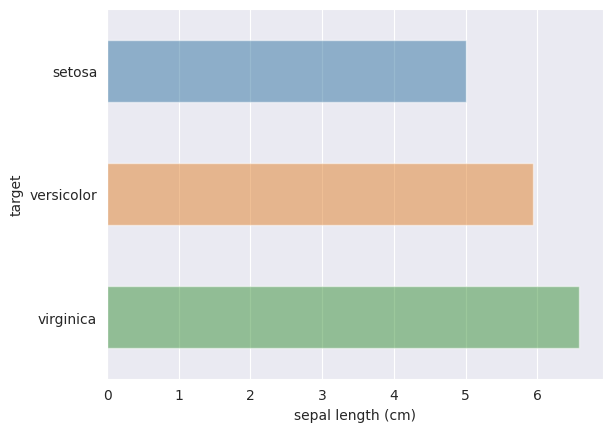

In [10]:
# 1.2 Create and customize bar charts using R or Python.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

sns.barplot(x = 'target', y = 'sepal length (cm)', data=iris)
plt.show()
plt.clf()
sns.barplot(x = 'sepal length (cm)', y = 'target', data = iris, alpha = 0.5, width = 0.5, errorbar=None)

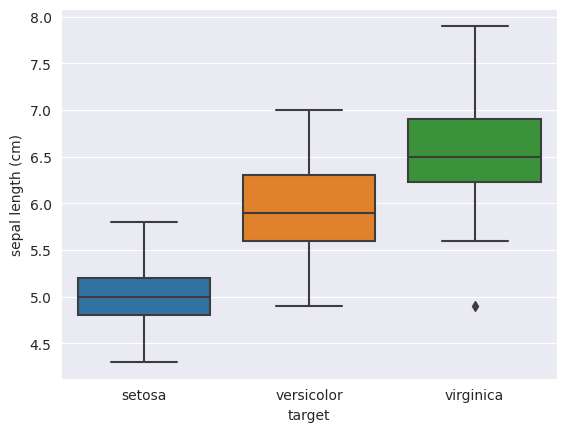

<Axes: xlabel='sepal length (cm)', ylabel='target'>

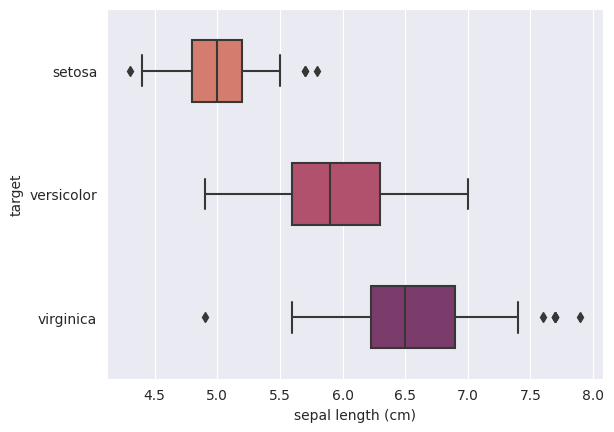

In [11]:
# 1.2 * Create and customize box plots using R or Python.

plt.clf()
sns.boxplot(data= iris, x='target', y = 'sepal length (cm)')
plt.show()
plt.clf()
sns.boxplot(data=iris, x='sepal length (cm)', y = 'target', whis = 1, width=0.5, palette='flare')

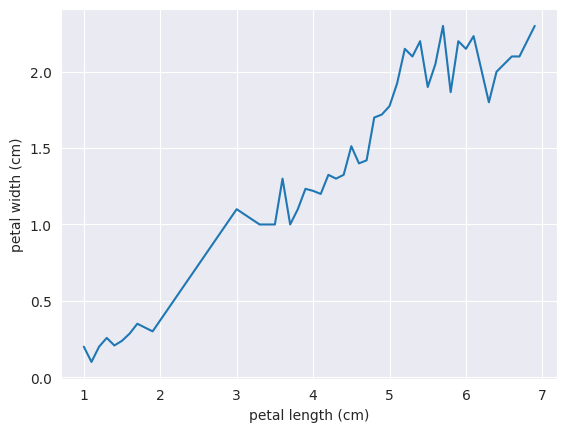

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

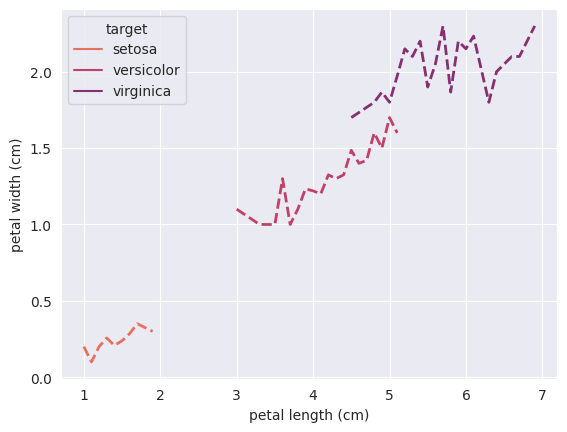

In [12]:
# 1.2 * Create and customize line graphs using R or Python.
plt.clf()
sns.lineplot(data=iris, x='petal length (cm)', y='petal width (cm)', errorbar=None)
plt.show()
plt.clf()
sns.lineplot(data=iris, x='petal length (cm)', y = 'petal width (cm)', hue='target', linestyle = '--', errorbar=None, linewidth=2, palette='flare')

<Figure size 640x480 with 0 Axes>

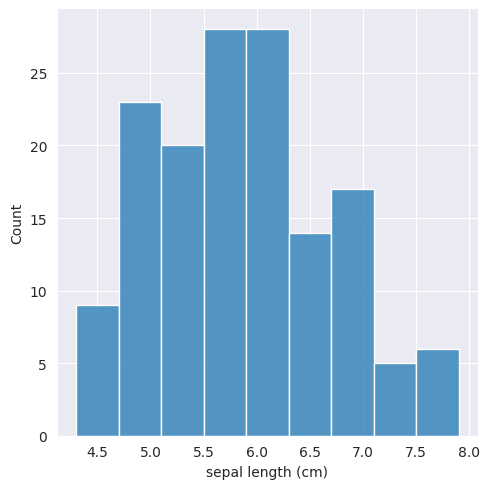

<Figure size 640x480 with 0 Axes>

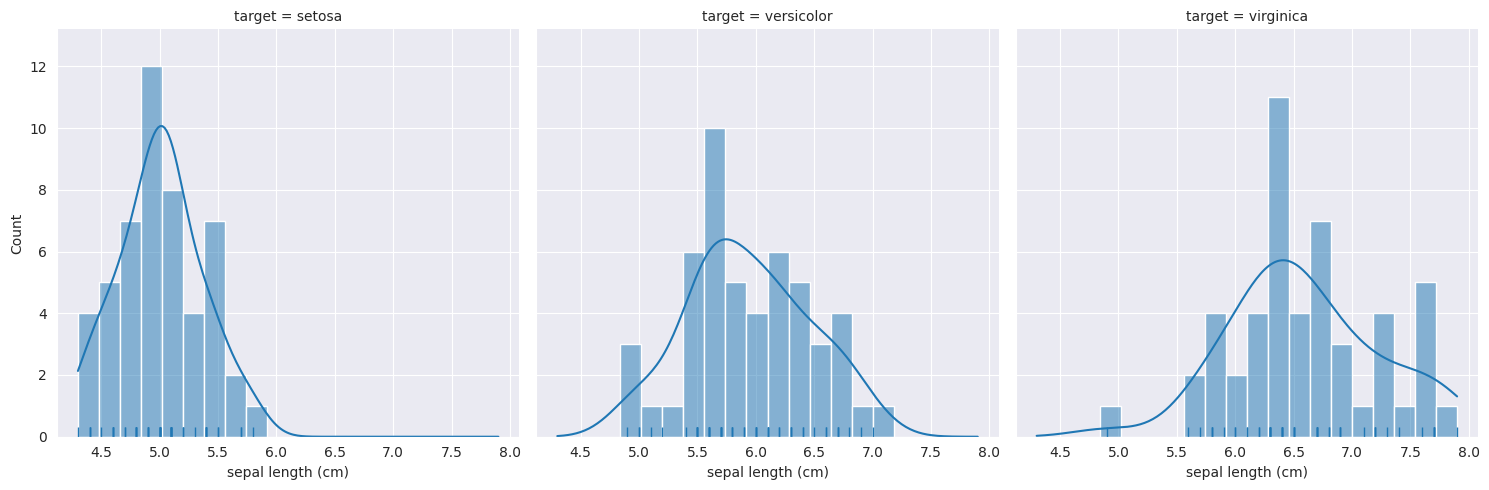

In [13]:
# 1.2 Create and customize histograms graph using R or Python.

plt.clf()
sns.displot(data=iris, x='sepal length (cm)', kind='hist')
plt.show()
plt.clf()
sns.displot(data=iris, x='sepal length (cm)', kind='hist', col='target', rug=True, bins=20, kde=True)

## 1.3 Create data visualizations in coding language to represent the relationships between features

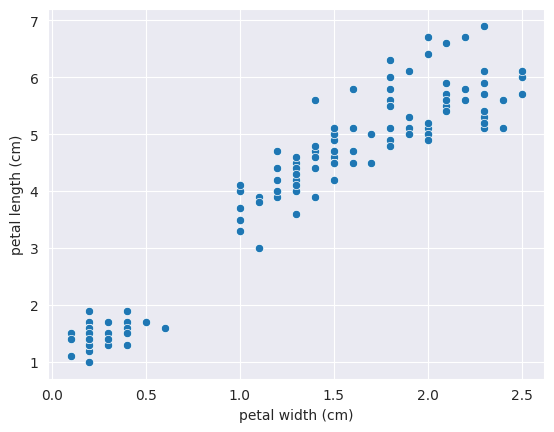

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

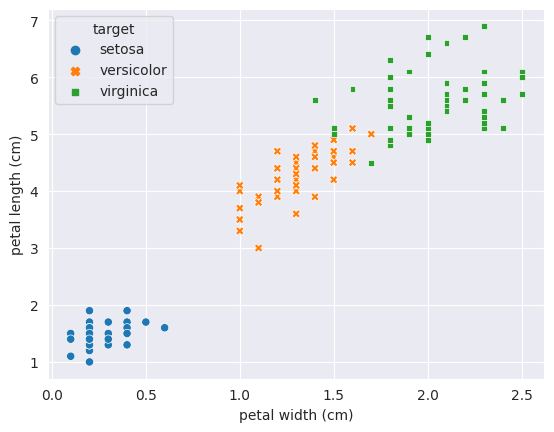

In [14]:
# 1.3 Create and customize scatterplots using R or Python.
sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)')
plt.show()
plt.clf()
markers = { 
'setosa' : '+',
'versicolor' : '*',
'virginica' : 's'
}
sns.scatterplot(data=iris, x='petal width (cm)', y='petal length (cm)', hue='target', style='target')

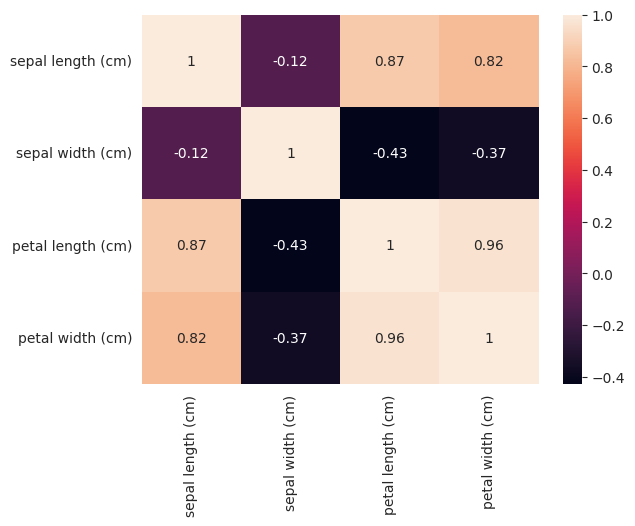

<Axes: >

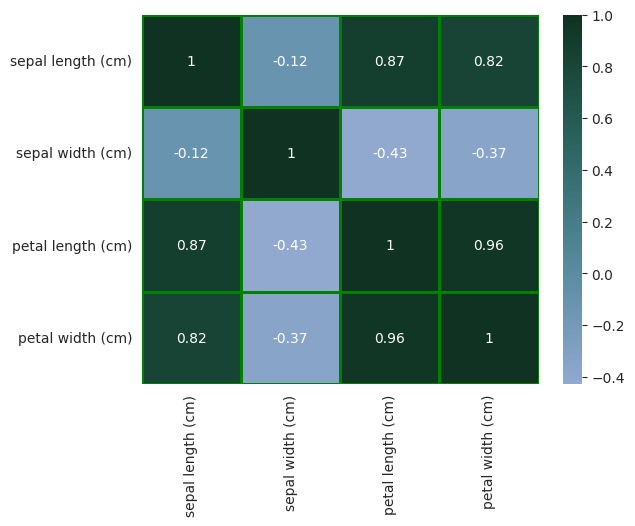

In [15]:
# 1.3 Create and customize heatmaps using R or Python.
sns.heatmap(data=iris[columns].corr(), annot=True)
plt.show()
plt.clf()
cmap = sns.cubehelix_palette(as_cmap=True, start= 20)
sns.heatmap(data=iris[columns].corr(), annot=True, linewidths=0.8, linecolor='g', center=0, cmap=cmap)

In [16]:
iris.columns[:-2]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], dtype='object')

In [17]:
# 1.3 Create and customize pivot tables using R or Python.
original_shape = iris.shape

pivoted_iris_index = iris.pivot_table(index='target', values=iris[columns])
display(pivoted_iris_index)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
target,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


## 1.4 Identify and reduce the impact of characteristics of data

# Methods

## Imputation Methods

* **Mean imputation:** This is the simplest imputation method. It replaces missing values with the mean of the observed values. This is a good method to use when the missing values are not randomly distributed.

* **Median imputation:** This is similar to mean imputation, but it replaces missing values with the median of the observed values. This is a good method to use when the missing values are not randomly distributed and the distribution of the data is skewed.
* **Mode imputation:** This replaces missing values with the mode of the observed values. This is a good method to use when the missing values are not randomly distributed and the distribution of the data is categorical.

* **K-nearest neighbors imputation:** This imputes missing values by finding the k nearest neighbors of the observation with missing values and then using the values of the k nearest neighbors to impute the missing values. This is a good method to use when the missing values are randomly distributed.

* **Bayesian imputation:** This imputes missing values using Bayesian statistics. This is a more complex method, but it can be more accurate than the other methods. Bayesian imputation is often used when the missing values are not randomly distributed.


In [45]:
# Create a NumPy array of shape (5,20)
arr = np.random.randint(0, 100, (20, 5))

# Create a DataFrame from the NumPy array
knn_frame = pd.DataFrame(arr)

# Randomly set some values to NaN
for i in range(20):
    for j in range(5):
        if np.random.random() < 0.2:
            knn_frame.iloc[i, j] = np.NAN


In [77]:
# 1.4 * Identify when imputation methods should be used and implement them to reduce the impact of missing data on analysis or modeling using R or Python.

# Mean inputation, values to replace missing values in numerical columns
display(mean)

# Median inputation, values to replace missing values in numerical columns
median_values_dict = dict(list(zip(columns,median)))
print(f'\n{median_values_dict}\n')

# Mode imputation, value to replace all columns
display(iris.mode())

# K-nearest imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(knn_frame)
KNN_results = imputer.transform(knn_frame)
print('KNN imputed data:')
print(KNN_results[:5,:])
print('Original data: ')
print(knn_frame.head())

# Bayesian imputation, Bayesian imputation is often used when the missing values are not randomly distributed.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #  default=BayesianRidge()
imp_mean = IterativeImputer(random_state=0)
bayesian_results = pd.DataFrame(imp_mean.fit_transform(knn_frame))
print('Original data:')
display(knn_frame.head(), knn_frame.isna().sum())
print('Imputed data:')
display(bayesian_results.head(), bayesian_results.isna().sum())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


{'sepal length (cm)': 5.8, 'sepal width (cm)': 3.0, 'petal length (cm)': 4.35, 'petal width (cm)': 1.3}



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


KNN imputed data:
[[30.  78.  54.  24.  51.8]
 [22.  48.   3.  48.  47. ]
 [86.  86.   9.  74.  91. ]
 [60.  98.   8.  29.  94. ]
 [92.  42.  56.6 32.   5. ]]
Original data: 
      0     1     2     3     4
0  30.0  78.0  54.0  24.0   NaN
1  22.0  48.0   3.0  48.0  47.0
2  86.0  86.0   9.0  74.0  91.0
3  60.0  98.0   8.0  29.0  94.0
4  92.0  42.0   NaN  32.0   5.0
Original data:


,0,1,2,3,4
0,30.0,78.0,54.0,24.0,NaN
1,22.0,48.0,3.0,48.0,47.0
2,86.0,86.0,9.0,74.0,91.0
3,60.0,98.0,8.0,29.0,94.0
4,92.0,42.0,NaN,32.0,5.0


0    6
1    3
2    4
3    2
4    8
dtype: int64

Imputed data:


,0,1,2,3,4
0,30.0,78.0,54.000000,24.0,56.149458
1,22.0,48.0,3.000000,48.0,47.000000
2,86.0,86.0,9.000000,74.0,91.000000
3,60.0,98.0,8.000000,29.0,94.000000
4,92.0,42.0,64.693438,32.0,5.000000


0    0
1    0
2    0
3    0
4    0
dtype: int64

## 1.4 *  Describe when a transformation to a variable is required and implement corresponding transformations using Python.

# Variable Transformations

Variable transformations are typically used when the data does not meet certain assumptions of the analysis or when we want to improve the interpretation or distribution of the data. Transformations can help address issues such as nonlinearity, heteroscedasticity, or skewness in the data.

Here are a few common scenarios where variable transformations may be necessary:

* **Nonlinear relationships:** If there is a nonlinear relationship between the dependent and independent variables, a transformation can help linearize the relationship. For example, if a scatter plot shows a curved relationship, you can apply a logarithmic, exponential, or power transformation.
* **Heteroscedasticity:** Heteroscedasticity occurs when the variability of the residuals is not constant across the range of predicted values. To address this, you can use a transformation that stabilizes the variance, such as taking the square root or the logarithm of the variable.
* **Skewed data:** Skewness refers to the asymmetry in the distribution of the data. If the data is heavily skewed, applying a transformation like the logarithm, square root, or reciprocal can help reduce the skewness and make the data more symmetric.

Here are some examples of variable transformations:

* **Logarithmic transformation:** The logarithmic transformation is often used to transform skewed data. It can also be used to linearize nonlinear relationships.
* **Square root transformation:** The square root transformation is also used to transform skewed data. It can also be used to stabilize the variance of the data.
* **Reciprocal transformation:** The reciprocal transformation is used to transform data that is heavily skewed to the right. It can also be used to stabilize the variance of the data.

Variable transformations can be a useful tool for improving the analysis of data. However, it is important to use them carefully and to understand the implications of the transformations on the data.


### Logarithmic transformation

The logarithmic transformation involves taking the logarithm of a variable. It is commonly used when the data exhibits exponential growth or decay. By applying the logarithm, the transformed variable spreads out the values and compresses larger values, making it useful for reducing the impact of extreme values and improving the interpretation of the data. Logarithmic transformations are often used in cases where the data spans several orders of magnitude.

### Exponential transformation

The exponential transformation involves raising a variable to the power of a constant value, typically the base of the natural logarithm, which is approximately 2.71828. This transformation is useful for reversing the effects of a logarithmic transformation or for representing variables that grow at an exponential rate. It is commonly used when the relationship between variables is multiplicative rather than additive. Exponential transformations can help linearize relationships with exponential growth or decay patterns.

### Power transformation

The power transformation involves raising a variable to a power. This transformation allows for a flexible adjustment of the data, enabling both stretching and compressing the values. The power value can be any real number, including fractions and negative values. A power transformation can be used to address nonlinear relationships by modifying the shape of the data. It is particularly useful when the relationship between variables is not linear or when there are extreme values in the data.

### Square root transformation

The square root transformation involves taking the square root of a variable. This transformation is commonly used to stabilize the variance of a variable when it exhibits heteroscedasticity, where the spread of the data varies with the mean. By taking the square root, the transformation reduces the impact of larger values, effectively compressing the range of values and making the data more symmetric. Square root transformations are often used when dealing with count data or when the data is positively skewed.

### Reciprocal transformation

The reciprocal transformation involves taking the reciprocal (1 divided by the variable) of a variable. This transformation is useful for addressing heavily skewed data, especially when the variable has a long right tail. By taking the reciprocal, the transformation effectively "flips" the distribution, placing more emphasis on smaller values and reducing the impact of larger values. Reciprocal transformations can help make the data more symmetric and are often used when dealing with variables that have a wide range of values, such as ratios or rates.



In [120]:
from sklearn.datasets import fetch_california_housing
path = '/home/nero/Documents/Estudos/DataCamp/Data_Science_Professional_certification_study/Exam_DS101/datasets'


data = fetch_california_housing(data_home=path, as_frame=True)
data = pd.concat([data.data, data.target*100000], axis=1)
data = data.drop(columns=['Latitude','Longitude'])

## Implementation

In [121]:
# logarithmic

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func=np.log10)
log_data = pd.DataFrame(transformer.transform(data), columns=data.columns)
display(log_data.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,0.920395,1.612784,0.844112,0.010219,2.507856,0.407485,5.655715
1,0.919151,1.322219,0.795055,-0.012387,3.380392,0.324250,5.554489
2,0.860781,1.716003,0.918457,0.030780,2.695482,0.447508,5.546666
3,0.751518,1.716003,0.764725,0.030624,2.746634,0.406190,5.533136
4,0.585032,1.716003,0.798088,0.033858,2.752048,0.338749,5.534280


In [122]:
# Exponential

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func=np.exp)
exp_data = pd.DataFrame(transformer.transform(data), columns=data.columns)
display(power_data.head())

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,1.903289,0.975968,1.106394,-0.296934,-1.619967,-0.368763,1.089037,-2.414735e-15,1.718078
1,1.897081,-0.568893,0.712367,-0.847336,1.090355,-1.186265,1.082404,-2.414735e-15,1.262941
2,1.604361,1.761010,1.673645,0.162493,-1.139853,0.005053,1.079079,-2.414735e-15,1.228314
3,1.051321,1.761010,0.461045,0.159137,-1.000270,-0.381080,1.079079,-2.414735e-15,1.168611
4,0.205878,1.761010,0.737176,0.228006,-0.985268,-1.040230,1.079079,-2.414735e-15,1.173649


In [123]:
# Power

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
power_data = pd.DataFrame(transformer.fit_transform(data), columns=data.columns)
display(power_data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,1.903289,0.975968,1.106394,-0.296934,-1.619967,-0.368763,1.718078
1,1.897081,-0.568893,0.712367,-0.847336,1.090355,-1.186265,1.262941
2,1.604361,1.761010,1.673645,0.162493,-1.139853,0.005053,1.228314
3,1.051321,1.761010,0.461045,0.159137,-1.000270,-0.381080,1.168611
4,0.205878,1.761010,0.737176,0.228006,-0.985268,-1.040230,1.173649


In [124]:
# Square root

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func=np.sqrt)
sqrt_data = pd.DataFrame(transformer.transform(data), columns=data.columns)
display(sqrt_data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,2.885342,6.403124,2.642750,1.011835,17.944358,1.598611,672.755528
1,2.881215,4.582576,2.497626,0.985840,49.000000,1.452529,598.748695
2,2.693956,7.211103,2.878912,1.036073,22.271057,1.673995,593.380148
3,2.375521,7.211103,2.411919,1.035886,23.622024,1.596228,584.208867
4,1.961173,7.211103,2.506363,1.039750,23.769729,1.476979,584.978632


In [125]:
# Reciprocal

def rec(x):
    return 1/x

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func=rec)
rec_data = pd.DataFrame(transformer.transform(data), columns=data.columns)
display(rec_data.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,0.120117,0.024390,0.143182,0.976744,0.003106,0.391304,0.000002
1,0.120462,0.047619,0.160304,1.028933,0.000416,0.473969,0.000003
2,0.137790,0.019231,0.120654,0.931579,0.002016,0.356855,0.000003
3,0.177208,0.019231,0.171900,0.931915,0.001792,0.392473,0.000003
4,0.259997,0.019231,0.159189,0.925000,0.001770,0.458407,0.000003


# 1.4 * Describe the differences between types of missingness and identify relevant approaches to handling types of missingness.

# Missingness in Data

Missingness in data can occur in different ways, and understanding the types of missingness is important for selecting appropriate approaches to handle missing data.

## Missing Completely at Random (MCAR)

In MCAR, the missingness is unrelated to both observed and unobserved data. This means that the missing data points are randomly distributed across the dataset. There is no systematic relationship between the missingness and the values of any variables. In this case, the missingness is considered to be completely random.

**Approaches for handling MCAR:**

* Complete Case Analysis (CCA): In CCA, the rows with missing values are simply removed from the analysis. This approach works well when the missingness is truly random and doesn't introduce bias.
* Single Imputation: Single imputation methods, such as mean imputation or regression imputation, fill in the missing values with estimated values based on the observed data. However, these methods can underestimate the uncertainty and lead to biased results.

## Missing at Random (MAR)

In MAR, the missingness is dependent on observed variables, but not on the unobserved data. The probability of missingness depends on the values of other variables in the dataset. In this case, the missingness is considered to be ignorable or missingness depends on observed information.

**Approaches for handling MAR:**

* Multiple Imputation (MI): MI creates multiple plausible imputed datasets, where missing values are imputed based on observed data and the relationships between variables. Analyses are performed on each imputed dataset, and the results are combined to obtain estimates and standard errors that incorporate the uncertainty of the missing data. MI is a flexible and widely used approach for handling missingness under the MAR assumption.

## Missing Not at Random (MNAR)

In MNAR, the missingness is related to unobserved data or missing values themselves. The missingness is not explained by any variables in the dataset, whether observed or unobserved. In this case, the missingness is considered to be non-ignorable or informative.

**Approaches for handling MNAR:**

* Sensitivity Analysis: Sensitivity analysis involves testing the robustness of the results by varying the assumptions about the missing data mechanism. Multiple scenarios are considered to assess the impact of different missing data mechanisms on the conclusions.
* Pattern-Mixture Models: Pattern-mixture models account for different missing data mechanisms by including additional variables or parameters to model the missingness process. These models explicitly consider different patterns of missing data and estimate parameters accordingly.

**It is important to note that the type of missingness is often not known with certainty, and the assumptions about missingness should be carefully considered when handling missing data. The choice of approach depends on the specific characteristics of the missing data and the research question at hand. It is recommended to consult with experts and carefully evaluate the potential biases and limitations of different approaches.**


## 1.4 * Identify and handle outliers using Python.

# Methods for Identifying Outliers

Outliers are data points that are significantly different from the rest of the data. They can be caused by a variety of factors, such as errors in data entry, measurement errors, or the presence of rare events. Outliers can have a significant impact on statistical analyses, so it is important to identify and handle them appropriately.

There are three main methods for identifying outliers:

* **Visualizations:** Visualizing the data using plots such as box plots, scatter plots, or histograms can help identify outliers. Outliers often appear as data points that are significantly distant from the majority of the data. By visually inspecting the plots, you can identify potential outliers and decide how to handle them.
* **Statistical Methods:** Statistical methods can be used to detect outliers based on their deviation from the mean or other statistical measures. Some commonly used methods include:
    * **Z-Score:** Calculate the z-score for each data point and identify those with a z-score above a certain threshold (e.g., 2 or 3).
    * **IQR (Interquartile Range):** Calculate the IQR for the data and identify outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
* **Machine Learning Techniques:** Machine learning algorithms can also be utilized to identify outliers. One such approach is the use of anomaly detection algorithms, such as Isolation Forest or Local Outlier Factor (LOF), which can identify data points that are significantly different from the rest.

Once outliers have been identified, there are a number of ways to handle them. Some common approaches include:

* **Deleting outliers:** This is the simplest approach, but it can also be the most drastic. Deleting outliers can remove valuable data from the analysis, so it should only be done if the outliers are clearly erroneous.
* **Imputing outliers:** This involves replacing the outliers with estimated values. There are a number of different imputation methods available, such as mean imputation, median imputation, and regression imputation.
* **Treating outliers as separate groups:** This involves creating separate groups for the outliers and the non-outliers. This can be useful if the outliers are likely to have different characteristics than the non-outliers.

It is important to note that there is no single "best" method for identifying outliers. The best method will depend on the specific data set and the desired outcome. It is also important to consider the impact of the outlier handling method on the analysis. For example, deleting outliers can reduce the power of the analysis, while imputing outliers can introduce bias.


## Handling Outliers

Outliers are data points that are significantly different from the rest of the data. They can be caused by a variety of factors, such as errors in data entry, measurement errors, or the presence of rare events. Outliers can have a significant impact on statistical analyses, so it is important to identify and handle them appropriately.

There are three main approaches to handling outliers:

* **Removal:** If the outliers are due to data entry errors or represent extreme values that are not representative of the underlying phenomenon, you may choose to remove them from the dataset. However, be cautious as removing outliers can impact the distribution and statistical properties of the data.
* **Winsorization:** Winsorization involves capping or flooring the extreme values by replacing them with a certain percentile value. For example, you can replace values above the 95th percentile with the value at the 95th percentile. This approach reduces the impact of outliers without completely removing them.
* **Transformation:** Transforming the data using mathematical functions such as logarithmic, square root, or reciprocal transformation can help mitigate the influence of outliers. These transformations can make the data more normally distributed and reduce the impact of extreme values.

**Removal**

* **Advantages:**
    * Simple to implement
    * Can be effective if the outliers are clearly erroneous
* **Disadvantages:**
    * Can reduce the power of the analysis
    * Can impact the distribution and statistical properties of the data

**Winsorization**

* **Advantages:**
    * Reduces the impact of outliers without completely removing them
    * Does not impact the distribution and statistical properties of the data as much as removal
* **Disadvantages:**
    * Can be more difficult to implement than removal
    * Can introduce bias if the outliers are not truly erroneous

**Transformation**

* **Advantages:**
    * Can make the data more normally distributed, which can improve the accuracy of statistical analyses
    * Can reduce the impact of outliers
* **Disadvantages:**
    * Can be more difficult to interpret than non-transformed data
    * Can introduce bias if the transformation is not appropriate

The best approach to handling outliers will depend on the specific data set and the desired outcome. It is important to consider the impact of the outlier handling method on the analysis. For example, removing outliers can reduce the power of the analysis, while winsorization can introduce bias.
